In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import pyspark
import matplotlib.pyplot as plt
from pyspark import SparkContext
sns.set(style="darkgrid")

In [2]:
#df = spark.read.csv('/FileStore/tables/Adatok.csv', sep = ';', header = "True")
df = spark.read.csv('/FileStore/tables/Distances-3.csv', sep = ';', header = "True")
df = df.toPandas()
df.Distance = df.Distance.astype("double")
df.head(5)

,Ref_User,Ref_User_Emotion,Ref_User_Emotion_Percentage,Eval,Eval_User_Emotion,Eval_User_Emotion_Percentage,Emotion,Intensity,Dimension,Distance,Within_User
0,Alpha,A,9,Alpha,A,21,Anger,Low,128,0.000,1
1,Alpha,A,10,Alpha,A,23,Anger,Low,128,0.000,1
2,Alpha,A,8,Alpha,A,20,Anger,Low,128,0.000,1
3,Alpha,A,9,Alpha,A,20,Anger,Low,128,0.014,1
4,Alpha,A,8,Alpha,A,21,Anger,Low,128,0.014,1


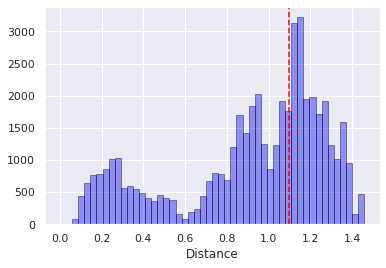

In [3]:
distp = sns.distplot(df['Distance'], hist=True, kde=False,color = 'blue',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

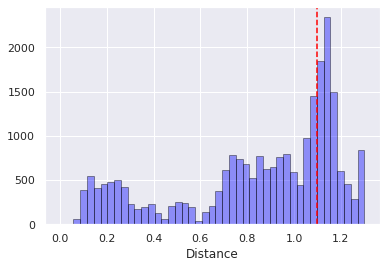

In [4]:
df_128 = df[df.Dimension == '128']
distp_128 = sns.distplot(df_128['Distance'], hist=True, kde=False, color = 'blue',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

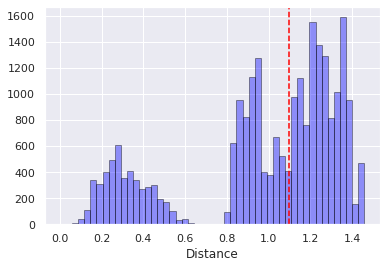

In [5]:
df_512 = df[df.Dimension == '512']
distp = sns.distplot(df_512['Distance'], hist=True, kde=False, color = 'blue',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

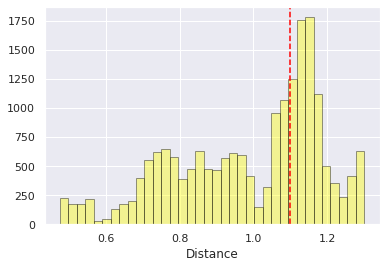

In [6]:
df_within_t = df[(df.Within_User == '0') & (df.Dimension == '128')]
distp = sns.distplot(df_within_t['Distance'], hist=True, kde=False, color = 'yellow',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

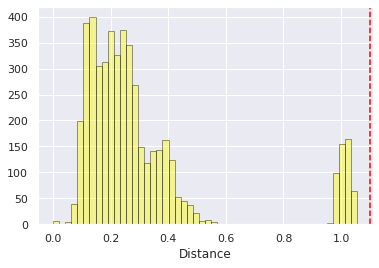

In [7]:
df_within_f = df[(df.Within_User == '1') & (df.Dimension == '128')]
distp = sns.distplot(df_within_f['Distance'], hist=True, kde=False, color = 'yellow',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

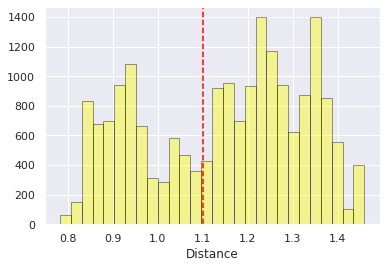

In [8]:
df_within_f = df[(df.Within_User == '0') & (df.Dimension == '512')]
distp = sns.distplot(df_within_f['Distance'], hist=True, kde=False, color = 'yellow',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

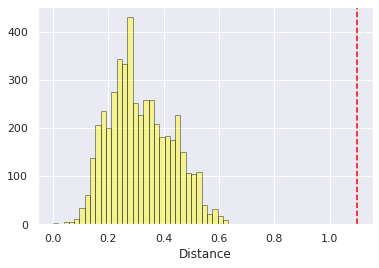

In [9]:
df_within_f = df[(df.Within_User == '1') & (df.Dimension == '512')]
distp = sns.distplot(df_within_f['Distance'], hist=True, kde=False, color = 'yellow',hist_kws={'edgecolor':'black'})
plt.axvline(1.1, color="red", linestyle="--");

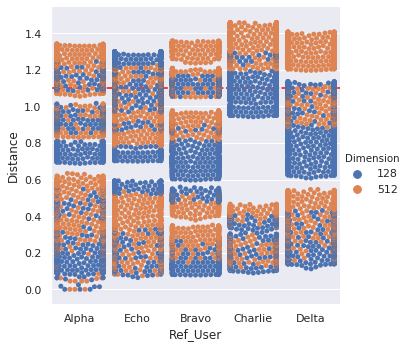

In [10]:
cat = sns.catplot(x="Ref_User", y="Distance", hue="Dimension", kind="swarm", data=df);
plt.axhline(1.1, color="red", linestyle="--");

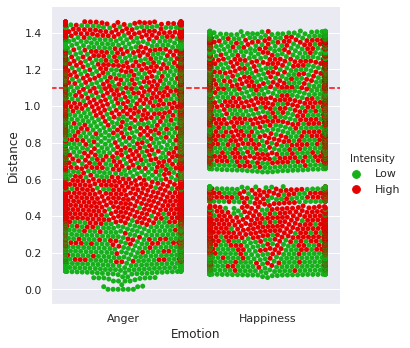

In [11]:
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

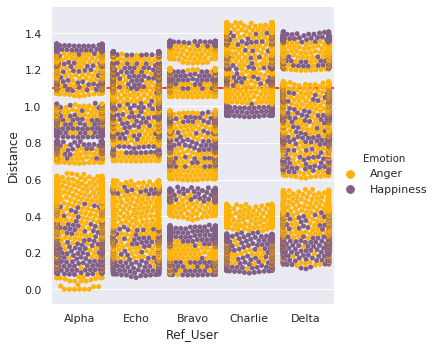

In [12]:
cat = sns.catplot(x="Ref_User", y="Distance", hue="Emotion", kind="swarm", data=df, palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

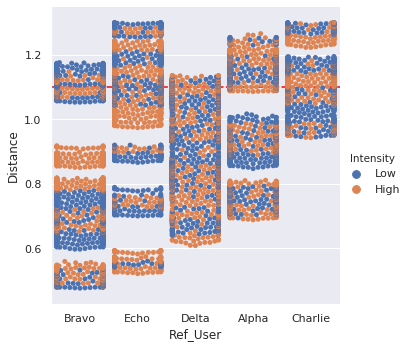

In [13]:
df_128 = df[(df.Within_User == '0') & (df.Dimension == '128')]
cat_128 = sns.catplot(x="Ref_User", y="Distance",hue="Intensity", kind="swarm", data=df_128);
plt.axhline(1.1, color="red", linestyle="--");

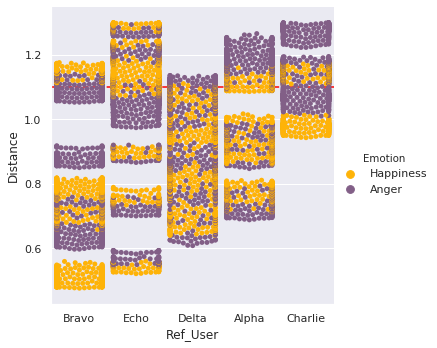

In [14]:
df_128 = df[(df.Within_User == '0') & (df.Dimension == '128')]
cat_128 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion", kind="swarm", data=df_128, palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

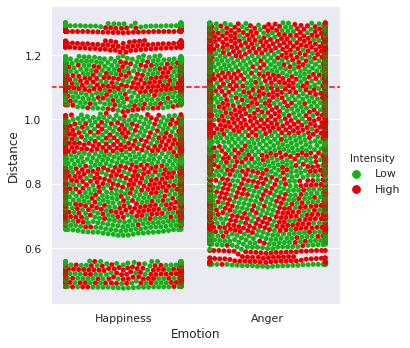

In [15]:
df_128 = df[(df.Within_User == '0') & (df.Dimension == '128')]
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df_128, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

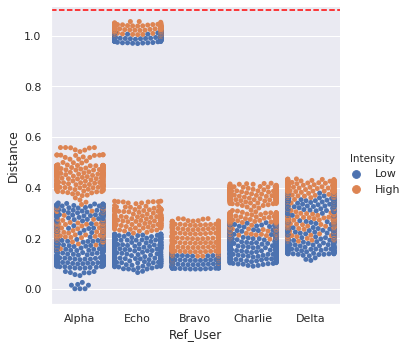

In [16]:
df_128 = df[(df.Within_User == '1') & (df.Dimension == '128')]
cat_128 = sns.catplot(x="Ref_User", y="Distance",hue="Intensity", kind="swarm", data=df_128);
plt.axhline(1.1, color="red", linestyle="--");

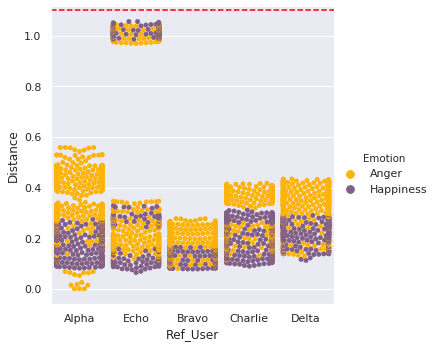

In [17]:
df_128 = df[(df.Within_User == '1') & (df.Dimension == '128')]
cat_128 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion", kind="swarm", data=df_128,palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

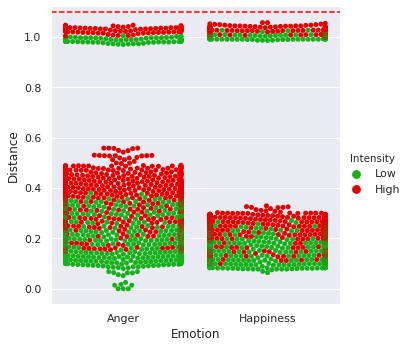

In [18]:
df_128 = df[(df.Within_User == '1') & (df.Dimension == '128')]
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df_128, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

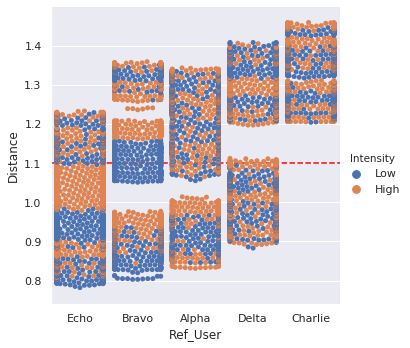

In [19]:
df_512 = df[(df.Within_User == '0') & (df.Dimension == '512')]
cat_512 = sns.catplot(x="Ref_User", y="Distance",hue="Intensity", kind="swarm", data=df_512);
plt.axhline(1.1, color="red", linestyle="--");

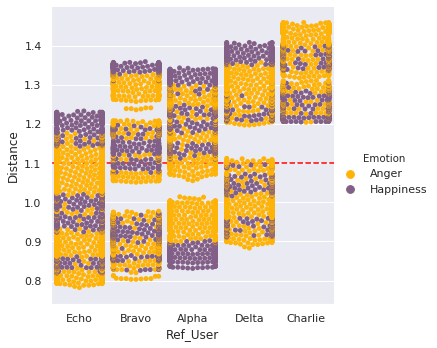

In [20]:
df_512 = df[(df.Within_User == '0') & (df.Dimension == '512')]
cat_512 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion", kind="swarm", data=df_512,palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

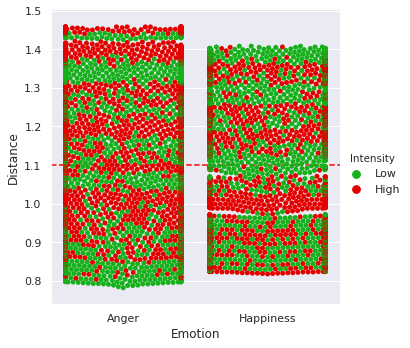

In [21]:
df_512 = df[(df.Within_User == '0') & (df.Dimension == '512')]
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df_512, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

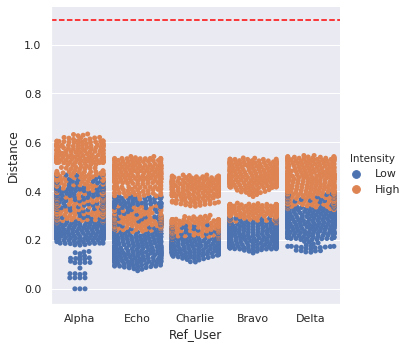

In [22]:
df_512 = df[(df.Within_User == '1') & (df.Dimension == '512')]
cat_512 = sns.catplot(x="Ref_User", y="Distance",hue="Intensity", kind="swarm", data=df_512);
plt.axhline(1.1, color="red", linestyle="--");

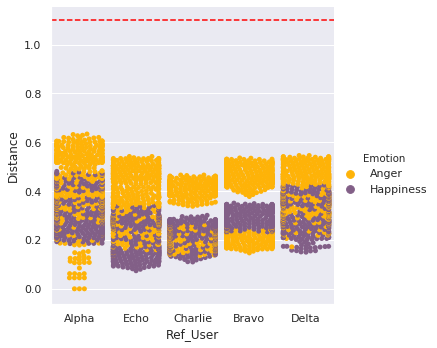

In [23]:
df_512 = df[(df.Within_User == '1') & (df.Dimension == '512')]
cat_512 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion", kind="swarm", data=df_512, palette=sns.xkcd_palette(["amber","dusty purple"]));
plt.axhline(1.1, color="red", linestyle="--");

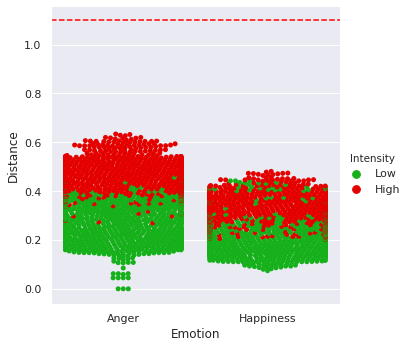

In [24]:
df_512 = df[(df.Within_User == '1') & (df.Dimension == '512')]
cat = sns.catplot(x="Emotion", y="Distance", hue="Intensity", kind="swarm", data=df_512, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

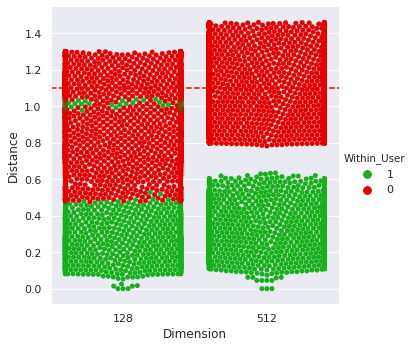

In [25]:
df_512_128 = df
cat = sns.catplot(x="Dimension", y="Distance", hue="Within_User", kind="swarm", data=df_512_128, palette=sns.xkcd_palette(["green","red"]));
plt.axhline(1.1, color="red", linestyle="--");

In [26]:
df.Ref_User_Emotion_Percentage = df.Ref_User_Emotion_Percentage.astype("int32")
df.Eval_User_Emotion_Percentage = df.Eval_User_Emotion_Percentage.astype("int32")
df.Dimension = df.Dimension.astype("int32")
df.Within_User = df.Within_User.astype("int32")

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-4488028818128299> in <module> 
 ----> 1 df . Ref_User_Emotion_Percentage = df . Ref_User_Emotion_Percentage . astype ( "int32" ) 
 2 df . Eval_User_Emotion_Percentage = df . Eval_User_Emotion_Percentage . astype ( "int32" ) 
 3 df . Dimension = df . Dimension . astype ( "int32" ) 
 4 df . Within_User = df . Within_User . astype ( "int32" ) 

 /databricks/python/lib/python3.7/site-packages/pandas/core/generic.py in astype (self, dtype, copy, errors) 
 5696 else : 
 5697 # else, only a single dtype is given 
 -> 5698 new_data = self . _data . astype ( dtype = dtype , copy = copy , errors = errors ) 
 5699 return self . _constructor ( new_data ) . __finalize__ ( self ) 
 5700 

 /databricks/python/lib/python3.7/site-packages/pandas/core/internals/managers.py in astype (self, dtype, copy, errors) 
 580 
 581 def astype ( self , dtype , copy : bool = False , errors : str = "raise" ) : 
 --> 582 return self . apply ( "astype" , dtype = dtype , copy = copy , errors = errors ) 
 583 
 584 def convert ( self , ** kwargs ) : 

 /databricks/python/lib/python3.7/site-packages/pandas/core/internals/managers.py in apply (self, f, filter, **kwargs) 
 440 applied = b . apply ( f , ** kwargs ) 
 441 else : 
 --> 442 applied = getattr ( b , f ) ( ** kwargs ) 
 443 result_blocks = _extend_blocks ( applied , result_blocks ) 
 444 

 /databricks/python/lib/python3.7/site-packages/pandas/core/internals/blocks.py in astype (self, dtype, copy, errors) 
 623 vals1d = values . ravel ( ) 
 624 try : 
 --> 625 values = astype_nansafe ( vals1d , dtype , copy = True ) 
 626 except ( ValueError , TypeError ) : 
 627 # e.g. astype_nansafe can fail on object-dtype of strings 

 /databricks/python/lib/python3.7/site-packages/pandas/core/dtypes/cast.py in astype_nansafe (arr, dtype, copy, skipna) 
 872 # work around NumPy brokenness, #1987 
 873 if np . issubdtype ( dtype . type , np . integer ) : 
 --> 874 return lib . astype_intsafe ( arr . ravel ( ) , dtype ) . reshape ( arr . shape ) 
 875 
 876 # if we have a datetime/timedelta array of objects 

 pandas/_libs/lib.pyx in pandas._libs.lib.astype_intsafe () 

 ValueError : invalid literal for int() with base 10: 'None'

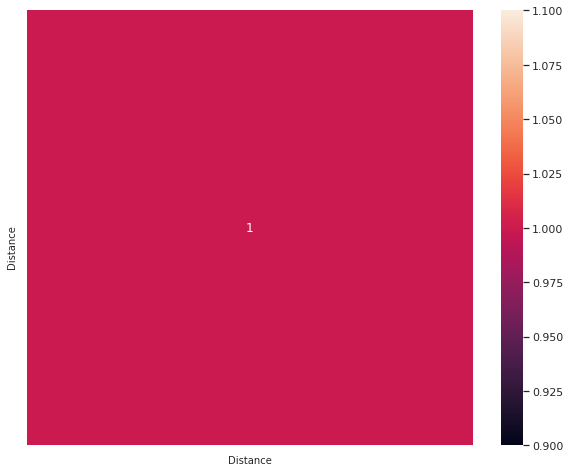

In [27]:
corr_df = df.corr()
sns.heatmap(corr_df, xticklabels=corr_df.columns.values, yticklabels=corr_df.columns.values, annot = True, annot_kws={'size':12})
heat_map=plt.gcf(); heat_map.set_size_inches(10,8)
plt.xticks(fontsize=10); plt.yticks(fontsize=10); 
plt.show()

In [28]:
df.Emotion = df.Emotion.astype("str")
df.Intensity = df.Intensity.astype("str")
df['Emotion_And_Intensity'] = df[['Emotion', 'Intensity']].apply(lambda x: '_'.join(x), axis=1)
df.head(5)

,Ref_User,Ref_User_Emotion,Ref_User_Emotion_Percentage,Eval,Eval_User_Emotion,Eval_User_Emotion_Percentage,Emotion,Intensity,Dimension,Distance,Within_User,Emotion_And_Intensity
0,Alpha,A,9,Alpha,A,21,Anger,Low,128,0.000,1,Anger_Low
1,Alpha,A,10,Alpha,A,23,Anger,Low,128,0.000,1,Anger_Low
2,Alpha,A,8,Alpha,A,20,Anger,Low,128,0.000,1,Anger_Low
3,Alpha,A,9,Alpha,A,20,Anger,Low,128,0.014,1,Anger_Low
4,Alpha,A,8,Alpha,A,21,Anger,Low,128,0.014,1,Anger_Low


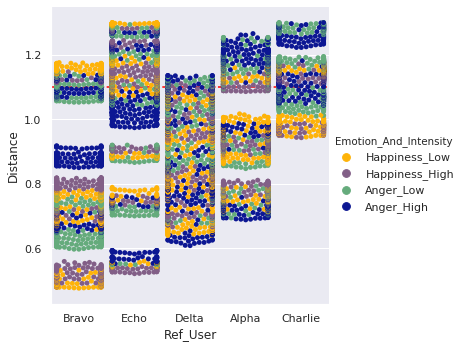

In [29]:
df_128_0 = df[(df.Within_User == '0') & (df.Dimension == '128')]
cat_128_0 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion_And_Intensity", kind="swarm", data=df_128_0, palette=sns.xkcd_palette(["amber","dusty purple","tea","royal"]));
plt.axhline(1.1, color="red", linestyle="--");

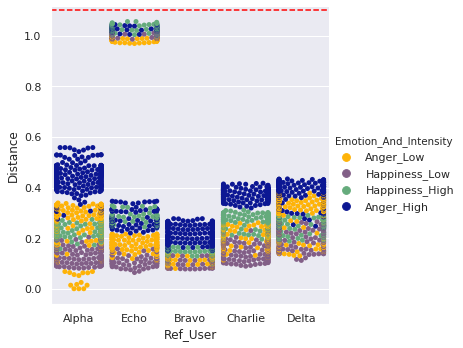

In [30]:
df_128_1 = df[(df.Within_User == '1') & (df.Dimension == '128')]
cat_128_1 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion_And_Intensity", kind="swarm", data=df_128_1, palette=sns.xkcd_palette(["amber","dusty purple","tea","royal"]));
plt.axhline(1.1, color="red", linestyle="--");

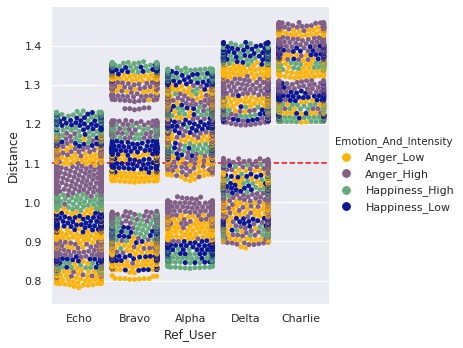

In [31]:
df_512_0 = df[(df.Within_User == '0') & (df.Dimension == '512')]
cat_512_0 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion_And_Intensity", kind="swarm", data=df_512_0, palette=sns.xkcd_palette(["amber","dusty purple","tea","royal"]));
plt.axhline(1.1, color="red", linestyle="--");

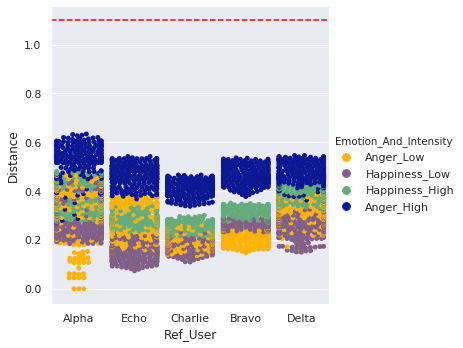

In [32]:
df_512_1 = df[(df.Within_User == '1') & (df.Dimension == '512')]
cat_512_1 = sns.catplot(x="Ref_User", y="Distance",hue="Emotion_And_Intensity", kind="swarm", data=df_512_1, palette=sns.xkcd_palette(["amber","dusty purple","tea","royal"]));
plt.axhline(1.1, color="red", linestyle="--");